# Explaining & Visualizing Principal Component Analysis and SVD
This Notebook aims to visualize PCA and show its connections to the Singular Value Decomposition. But first, I will briefly explain Quadratic Forms of matricies, constrained optimization problems and derive PCA and its connections to the SVD.

## 1. Quadratic Forms
Let $A =
\begin{bmatrix}
4 && 1.5 \\
1.5 && 7
\end{bmatrix}
$ (a symmetric matrix). A quadratic form $x^TAx = 4x_1^2 + 7x_2^2 + 3x_1 x_2$

For **diagonal matricies**, the resulting equation does not include cross-product terms and is thus, much easier to work with. **Example:**

Let $A =
\begin{bmatrix}
4 && 0 \\
0 && 7
\end{bmatrix}
$. A quadratic form $x^TAx = 4x_1^2 + 7x_2^2$. We thus want our matrix to be **diagonal**. We can change it to be that way!

#### Change of Variable
First define a change of variable: $x = Py$ where $P$ is an orthogonal matrix with **orthonormal columns**. We will now see why this is very beneficial and simplifies the problem alot! Now rewrite the equation as:

$x^TAx = (Py)^TA(Py) = y^TP^TA(Py) = y^T(P^TAP)y$

Now it is obvious why a change of variable with $P$ having **orthonormal columns** is nice: We now have $P^TAP = D$ because $A = PDP^T$, where $PDP^T$ is an **eigenvalue decomposition** of $A$.

Now we have $y^TDy$ and the matrix is diagonal! We can get to x again with $x = Py$.

## 2. Constrained Optimization
I will now describe a very simple constrained optimization problem where we want to maximize the quadratic form $ x^TAx $ subj. to $\lVert x \lVert=1$. This problem has a very interesting solution.

So since $A$ is symmetric, it is **orthogonally diagonizable**. We know from sec. 1: $y^TDy$. So just **create an eigenvalue decomposition**, and let $D$ be the diagonal matrix of eigenvalues, arranged in descending order, with the eigenvectors in $P$ according to $D$ and normalized.

How is $y^TDy$ maximized?

**Example:**

Let $D =
\begin{bmatrix}
9 && 0 \\
0 && 6
\end{bmatrix}
$. So $y^TDy = 9y_1^2 + 6y_2^2$. The maximum value of the function is reached if $y=\begin{bmatrix}1 \\ 0\end{bmatrix}$. It is 9, the largest eigenvalue of $A$, corresponding to its eigenvector $Py$. So the $x$ that maximizes $x^TAx$ is the eigenvector of the largest eigenvalue of $A$.

**Now we are ready to discuss the SVD and PCA!**

## 3. The Singular Value Decomposition
Every mxn matrix $A$ can be described in the form $AV=U\Sigma$. So $A=U\Sigma V^T$. I will briefly describe the decomposition.

#### Singular Values
We want to find vector $v$ of magnitude 1, that maximizes $\lVert Av \lVert$. Since the same vector maximizes $\lVert Av \lVert^2$, and this problem is much easier, we will maximize $\lVert Av \lVert^2$.

**=>** $argmax_v(\lVert Av \lVert) = argmax_v(\lVert Av \lVert^2)$

$\lVert Av \lVert^2 = (Av)^T(Av) = v^T A^T Av$

This is a **Quadradic Form** since $A^TA$ is **symmetric**. We know that its unit **eigenvector** maximizes $v^T A^T Av$, with its corresponding **eigenvalue** as the maximum. Therefore $max(\lVert Av \lVert) = \sqrt{max(\lVert Av \lVert^2)}$, which is called **singular value** $\sigma_1$ of $A$ with the unit eigenvector $v_1$ from $A^TA$. $A$ has as many singular values as linearly independent columns ($range(A)$).

Finally we have: $\lVert Av_i \lVert=\sigma_i$

Now construct $U\Sigma$, which must equal to $AV$.

$dim(A)=$mxn

$dim(U)=$mxm, called left singular vectors.

$dim(\Sigma)=$mxn, diagonal matrix with singular values $\sigma_i$ of $A$ in descending order.

$dim(V)=$nxn, called right singular vectors (Orthonormal eigenvectors of $A^TA$).

We define the columns of $U$ [$u_1$,...,$u_m$] as $u_i = \frac{Av_i}{\sigma_i}$.
We define $\Sigma$ to be a **diagonal matrix** with the **singular values** $\sigma$ of A, in descending order, and the eigenvectors in $V$ arranged accordingly.

Therefore $AV = U\Sigma$ and $A = U\Sigma V^T$

## 4. Relationship between SVD and PCA
I will briefly describe how the **covariance matrix** of $X$ ($C_x$) is related its SVD. For simplicity, define $X$ to already be in **mean-deviation form**.

$COV(X) = \frac{XX^T}{n-1} = C_x$

$COV(X) = (U\Sigma V^T)(U\Sigma V^T)^T/(n-1) = U\Sigma V^T  V\Sigma^T U^T / (n-1) = U\frac{\Sigma^2}{n-1}U^T = C_x$

Recall that the goal of PCA is to find a change of variable $X=PY$ for which the new covariance matrix is diagonal. Because $P^TX=Y$:

$COV(Y) = (P^TX)(P^TX)^T/(n-1) = P^T(C_x(n-1))P/(n-1) = P^TC_xP = D$

So we have $C_x = PDP^T$

From the SVD we have $C_x = U\frac{\Sigma^2}{n-1}U^T$

Both $P$ and $U$ are **orthonormal eigenvectors** of $XX^T$. **Both decompositions differ just by the scaling factor** $n-1$ in the **diagonal matricies** (since the columns of $P$ and $U$ have same length of 1). The eigenvalues $\lambda_i$ of $D$ are related to the singular values from the **SVD** $\sigma_i$ via $\lambda_i = \frac{\sigma_i}{n-1}$.

## Visualizing PCA

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
df[4] = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df = df.sample(frac=1.0)

In [4]:
df.head(3)

,0,1,2,3,4
16,5.4,3.9,1.3,0.4,0
0,5.1,3.5,1.4,0.2,0
102,7.1,3.0,5.9,2.1,2


### Plot iris-data in 3 dimensions

In [5]:
X = df.iloc[:, :-1].as_matrix().T

X_mean = np.mean(X, axis=1).reshape(-1, 1)
X_std = np.std(X, axis=1).reshape(-1, 1)

X -= X_mean
X /= X_std

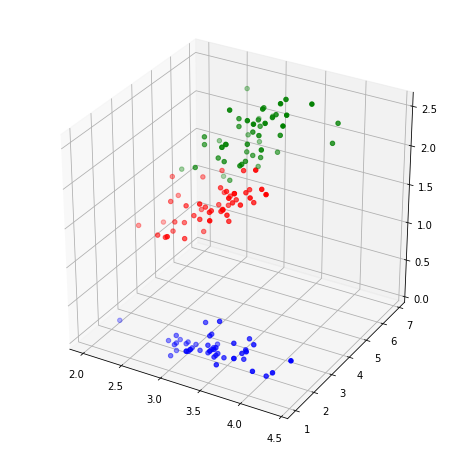

In [6]:
df1 = df.iloc[:, 1:]

class0 = df1[df1[4]==0]
class1 = df1[df1[4]==1]
class2 = df1[df1[4]==2]

class0_mat = (df[df[4]==0].iloc[:, :-1].as_matrix().T - X_mean) / X_std
class1_mat = (df[df[4]==1].iloc[:, :-1].as_matrix().T - X_mean) / X_std
class2_mat = (df[df[4]==2].iloc[:, :-1].as_matrix().T - X_mean) / X_std

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0.iloc[:, 0], class0.iloc[:, 1], class0.iloc[:, 2], c='blue')
ax.scatter(class1.iloc[:, 0], class1.iloc[:, 1], class1.iloc[:, 2], c='red')
ax.scatter(class2.iloc[:, 0], class2.iloc[:, 1], class2.iloc[:, 2], c='green')

In [7]:
U, S, Vh = np.linalg.svd(X)

### Project data onto first 3 principal components & plot in 3D

In [8]:
U = U[:, :-1]
Y_0 = U.T @ class0_mat
Y_1 = U.T @ class1_mat
Y_2 = U.T @ class2_mat

Text(0.5,0,'Principal Component 3')

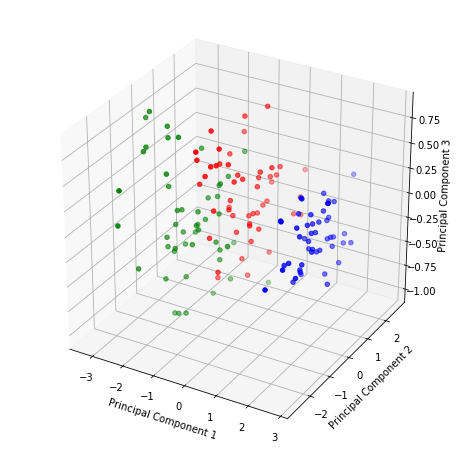

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_0[0], Y_0[1], Y_0[2], c='blue')
ax.scatter(Y_1[0], Y_1[1], Y_1[2], c='red')
ax.scatter(Y_2[0], Y_2[1], Y_2[2], c='green')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

In [10]:
U, S, Vh = np.linalg.svd(X)

### Project data onto first and second principal components & plot in 2D

In [11]:
U = U[:, :-2]
Y_0 = U.T @ class0_mat
Y_1 = U.T @ class1_mat
Y_2 = U.T @ class2_mat

Text(0,0.5,'Principal Component 2')

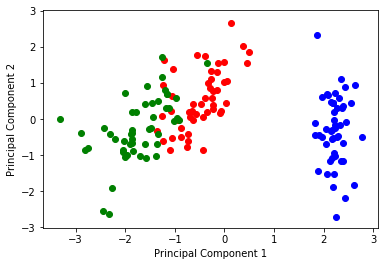

In [12]:
plt.scatter(Y_0[0], Y_0[1], c='blue')
plt.scatter(Y_1[0], Y_1[1], c='red')
plt.scatter(Y_2[0], Y_2[1], c='green')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

### Variances of P.C.s
By examining how much variance each principal component explains, one can conclude that the first 3 P.C.s suffice to explain most of the data.

In [13]:
print('Number of P.C.s:', len(S))
print('First P.C. explains', np.sum(S[0]) / np.sum(S), 'of the total variance.')
print('Second P.C. explains', np.sum(S[1]) / np.sum(S), 'of the total variance.')
print('Third P.C. explains', np.sum(S[2]) / np.sum(S), 'of the total variance.')

Number of P.C.s: 4
First P.C. explains 0.534272850491 of the total variance.
Second P.C. explains 0.300564353054 of the total variance.
Third P.C. explains 0.120208582163 of the total variance.
